<a href="https://colab.research.google.com/github/vivek87799/linear_regression_scratch/blob/main/linear_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd

https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1

# Load Dataset

In [5]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 506


In [13]:
pd.DataFrame(dataset.data, columns=dataset.feature_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Cost Function
- We use mean squared error as our cost funciton

In [ ]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2) #loss

# Gradient Descent

In [ ]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)  

    return (J_history, params)

In [ ]:
X.shape

(506, 13)

# Normalize input data

In [ ]:
n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [ ]:
X.shape

(506, 14)

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


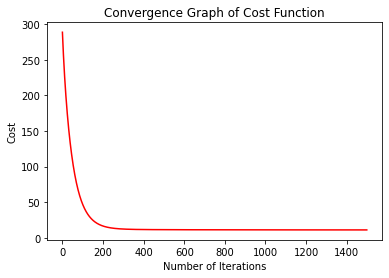

In [ ]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Complete implementation

In [ ]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        #self.X = np.hstack((np.ones(
        #    (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.X = X
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

# Harish Capgemini task

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/movie.csv", encoding="latin-1")
df.shape

(18166, 14)

In [ ]:
# Remove null values from duration_in_min and generes
data_set = df[df["duration_in_min"].notna()].copy()
data_set = data_set[data_set["genres"].notna()].copy()
# data_set = data_set[data_set["primaryprofession"].notna()].copy()
# Encoding of features with characters
ord_enc = OrdinalEncoder()
data_set["region_encode"] = ord_enc.fit_transform(data_set[["region"]])
data_set["genres_encode"] = ord_enc.fit_transform(data_set[["genres"]])
data_set["role_encode"] = ord_enc.fit_transform(data_set[["role"]])
# data_set["primaryprofession_encode"] = ord_enc.fit_transform(data_set[["primaryprofession"]])

In [ ]:
data_set_before_normalize_1 = data_set[["region_encode", "release_year", "duration_in_min",	"genres_encode",	"numvotes", "role_encode","rating"]]
data_set_before_normalize_1 = data_set_before_normalize_1.reset_index()
data_set_before_normalize_1.drop(['index'],axis=1,inplace=True)
data_set_before_normalize_1

,region_encode,release_year,duration_in_min,genres_encode,numvotes,role_encode,rating
0,9.0,1915,50.0,484.0,8,1.0,6.5
1,20.0,1915,50.0,517.0,9,0.0,7.3
2,9.0,1917,60.0,423.0,16,0.0,6.8
3,20.0,1917,56.0,601.0,71,0.0,5.5
4,8.0,1918,60.0,262.0,9,1.0,6.9
...,...,...,...,...,...,...,...
16816,3.0,1997,92.0,278.0,91,0.0,5.5
16817,9.0,1985,91.0,413.0,1245,0.0,3.0
16818,20.0,1941,90.0,399.0,21,0.0,8.7
16819,20.0,1959,85.0,360.0,78,1.0,5.9


In [ ]:
features = ["release_year", "duration_in_min","numvotes"]
data_set_before_normalize_1[["release_year", "duration_in_min","numvotes"]] = min_max_scaler.fit_transform(data_set_before_normalize_1[["release_year", "duration_in_min","numvotes"]])

In [ ]:

# Extract missing ratings as they are to be tested (Test Data)
train_data_set = data_set_before_normalize_1[data_set_before_normalize_1["rating"].notna()].copy()
test_data_set = data_set_before_normalize_1[data_set_before_normalize_1["rating"].isna()].copy()

In [ ]:
# Normalize the dataset 
data_set_before_normalize_1 = data_set[["region_encode", "release_year", "duration_in_min",	"genres_encode",	"numvotes",	"primary_name_encode", "role_encode"]]
data_set_before_normalize_2 = data_set[["region_encode",  "genres_encode", "primary_name_encode", "role_encode"]]
data_set_before_normalize_3 = data_set[["release_year", "duration_in_min","numvotes",]]
min_max_scaler = preprocessing.MinMaxScaler()
data_set_normalized = min_max_scaler.fit_transform(data_set_before_normalize_1)
data_set_normalized_df = pd.DataFrame(data_set_normalized,columns=data_set_before_normalize_1.columns)

In [ ]:
# Extract missing ratings as they are to be tested (Test Data)
train_data_set = data_set[data_set["rating"].notna()].copy()
test_data_set = data_set[data_set["rating"].isna()].copy()

In [ ]:
Y = pd.DataFrame(train_data_set.rating)
X = train_data_set.drop(['rating'],axis=1)
(trainx,testx,trainy,testy) =  train_test_split(X,Y,test_size=0.30)


In [ ]:
trainx.shape
testx.shape

(5019, 6)

In [ ]:
lin = LinearRegression()
lin.fit(trainx,trainy)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin.predict(testx)

In [ ]:
len(y_pred)

5019

In [ ]:
testy.drop(['predicted','predicted1'],axis=1,inplace=True)
testy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rating
9080,6.6
16008,6.8
15444,6.6
12917,5.3
13623,6.1
...,...
14303,5.4
13859,6.1
8495,5.8
12272,5.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))

Mean Absolute Error: 0.8208428188767563
Mean Absolute Error: 0.8208428188767563
Mean Squared Error: 1.1121867255341567
Root Mean Squared Error: 1.0546026386910647


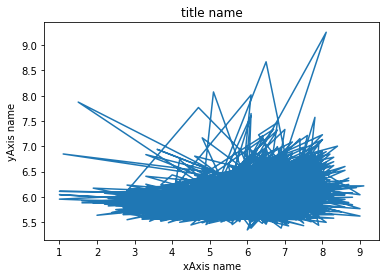

In [ ]:
import matplotlib.pyplot as plt

plt.plot(testy,y_pred)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
 data = pd.DataFrame()
data['actual'] = testy
data['predicted'] = y_pred
data

ValueError: ignored

In [ ]:
lin_score_train = lin.score(trainx,trainy)
lin_score_test = lin.score(testx,testy)
print(lin_score_train)
print(lin_score_test)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

# Normalize train data set 
data_set_before_normalize_1 = train_data_set[["region_encode", "release_year", "duration_in_min",	"genres_encode",	"numvotes",	"primary_name_encode", "role_encode", "primaryprofession_encode"]]
data_set_before_normalize_2 = train_data_set[["region_encode",  "genres_encode", "primary_name_encode", "role_encode", "primaryprofession_encode"]]
data_set_before_normalize_3 = train_data_set[["release_year", "duration_in_min","numvotes",]]
train_data_set_before_normalize = train_data_set[["region_encode", "release_year", "duration_in_min",	"genres_encode",	"numvotes",	"primary_name_encode", "role_encode", "primaryprofession_encode"]]

In [ ]:
train_data_set_normalized = min_max_scaler.fit_transform(data_set_before_normalize_3)
train_data_set_normalized_df = pd.DataFrame(data_set_before_normalize_2)

# Normalize test data set
test_data_set_before_normalize = test_data_set[["region_encode", "release_year", "duration_in_min",	"genres_encode",	"numvotes",	"primary_name_encode", "role_encode", "primaryprofession_encode"]]
test_data_set_normalized = min_max_scaler.fit_transform(test_data_set_before_normalize)
test_data_set_normalized_df = pd.DataFrame(test_data_set_normalized)

In [ ]:
X = train_data_set_normalized_df
Y = train_data_set['rating']
print(X.shape)
print(Y.shape)
(trainx,testx,trainy,testy) =  train_test_split(X,Y,test_size=0.30)
print("trainx-->",trainx.shape)
print("testx-->",testx.shape)
print("trainy-->",trainy.shape)
print("trainx-->",testy.shape)

In [ ]:
lin = LinearRegression()
lin.fit(trainx,trainy)
lin_score_train = lin.score(trainx,trainy)
lin_score_test = lin.score(testx,testy)
print(lin_score_train)
print(lin_score_test)

0.06958943228448589
0.08030731341245201


In [ ]:
lin.coef_

array([[ 5.44925283e-03, -8.85402628e-01,  8.75430966e+00,
         4.61237007e-04,  6.21866204e+00,  1.51658003e-01]])